In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = ['Arial']

In [2]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

### Loading the SHAPE-reactivities:

In [3]:
deltafive = pd.read_csv('../../Data/SHAPE_35S/35S_SHAPE_reactivities.txt',\
                 sep="\t",header=None,index_col=0,names=["position","reactivity","error"])
erb = pd.read_csv('../../Data/SHAPE_35S/35S_Erb1_dep_SHAPE_reactivities.txt',\
                  sep="\t",header=None,index_col=0,names=["position","reactivity","error"])

### Removing negative values

In [4]:
deltafive[deltafive.reactivity < 0] = 0

In [5]:
deltafive.head()

,reactivity,error
position,,
1,0.010793,0.013891
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.022429,0.003348


In [6]:
erb[erb.reactivity < 0] = 0

In [7]:
erb.head()

,reactivity,error
position,,
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


### Loading the difBUM_HMM output for the entire 35S:

In [8]:
diff_bumhmm = pd.read_csv('../../Analysis/diffBUM-HMM/35S_diffBUM_HMM_WT_vs_Erb1_diff_BUM_HMM_analysed.txt',\
                                    sep="\t", header=0)

### So UM is more flexible in Erb1 and MU is more flexible in Delta 5

In [9]:
diff_bumhmm.head()

,UU,UM,MU,MM
1,1.0,4.266924e-21,3.750536e-25,1.600325e-45
2,1.0,4.503509e-28,5.135967e-30,2.312988e-57
3,1.0,6.985186e-25,2.027740e-27,1.416414e-51
4,1.0,1.859237e-41,2.117164e-50,3.936309e-91
5,1.0,4.163330e-13,1.314801e-19,5.473952e-32


### Same for deltaSHAPE:

In [10]:
deltashapeone = pd.read_csv('../../Analysis/deltaSHAPE/35S_deltaerb1_Vs_delta5_reps1.txt',\
                            sep="\t",header=0,index_col=0)
deltashapetwo = pd.read_csv('../../Analysis/deltaSHAPE/35S_deltaerb1_Vs_delta5_reps2.txt',\
                            sep="\t",header=0,index_col=0)

In [11]:
deltashapeone.head()

,Seq,DeltaSHAPE,Z-factor,Std_Score,Smoothed_Data1,Smoothed_Data2,Unsmoothed_Diff,Data1,Data2
Nuc,,,,,,,,,
19,A,-0.098252,1.0,-1.513988,-0.271531,-0.173279,-0.077171,-0.221898,-0.144726
20,C,-0.116317,1.0,-1.792208,-0.238339,-0.122022,-0.167267,-0.390108,-0.222841
21,A,-0.110858,1.0,-1.708128,-0.222391,-0.111533,-0.104513,-0.103012,0.001501
22,A,-0.100193,1.0,-1.543879,-0.186205,-0.086012,-0.060793,-0.174053,-0.113261
23,G,-0.080918,1.0,-1.247043,-0.218313,-0.137395,-0.135272,-0.281549,-0.146277


### Loading the dStruct analyses:

In [12]:
datafile = open("../../Analysis/dStruct/res_table_dStruct_35S_search_length_11nt.txt","r").readlines()    

### Plotting the data for the entire 35S:

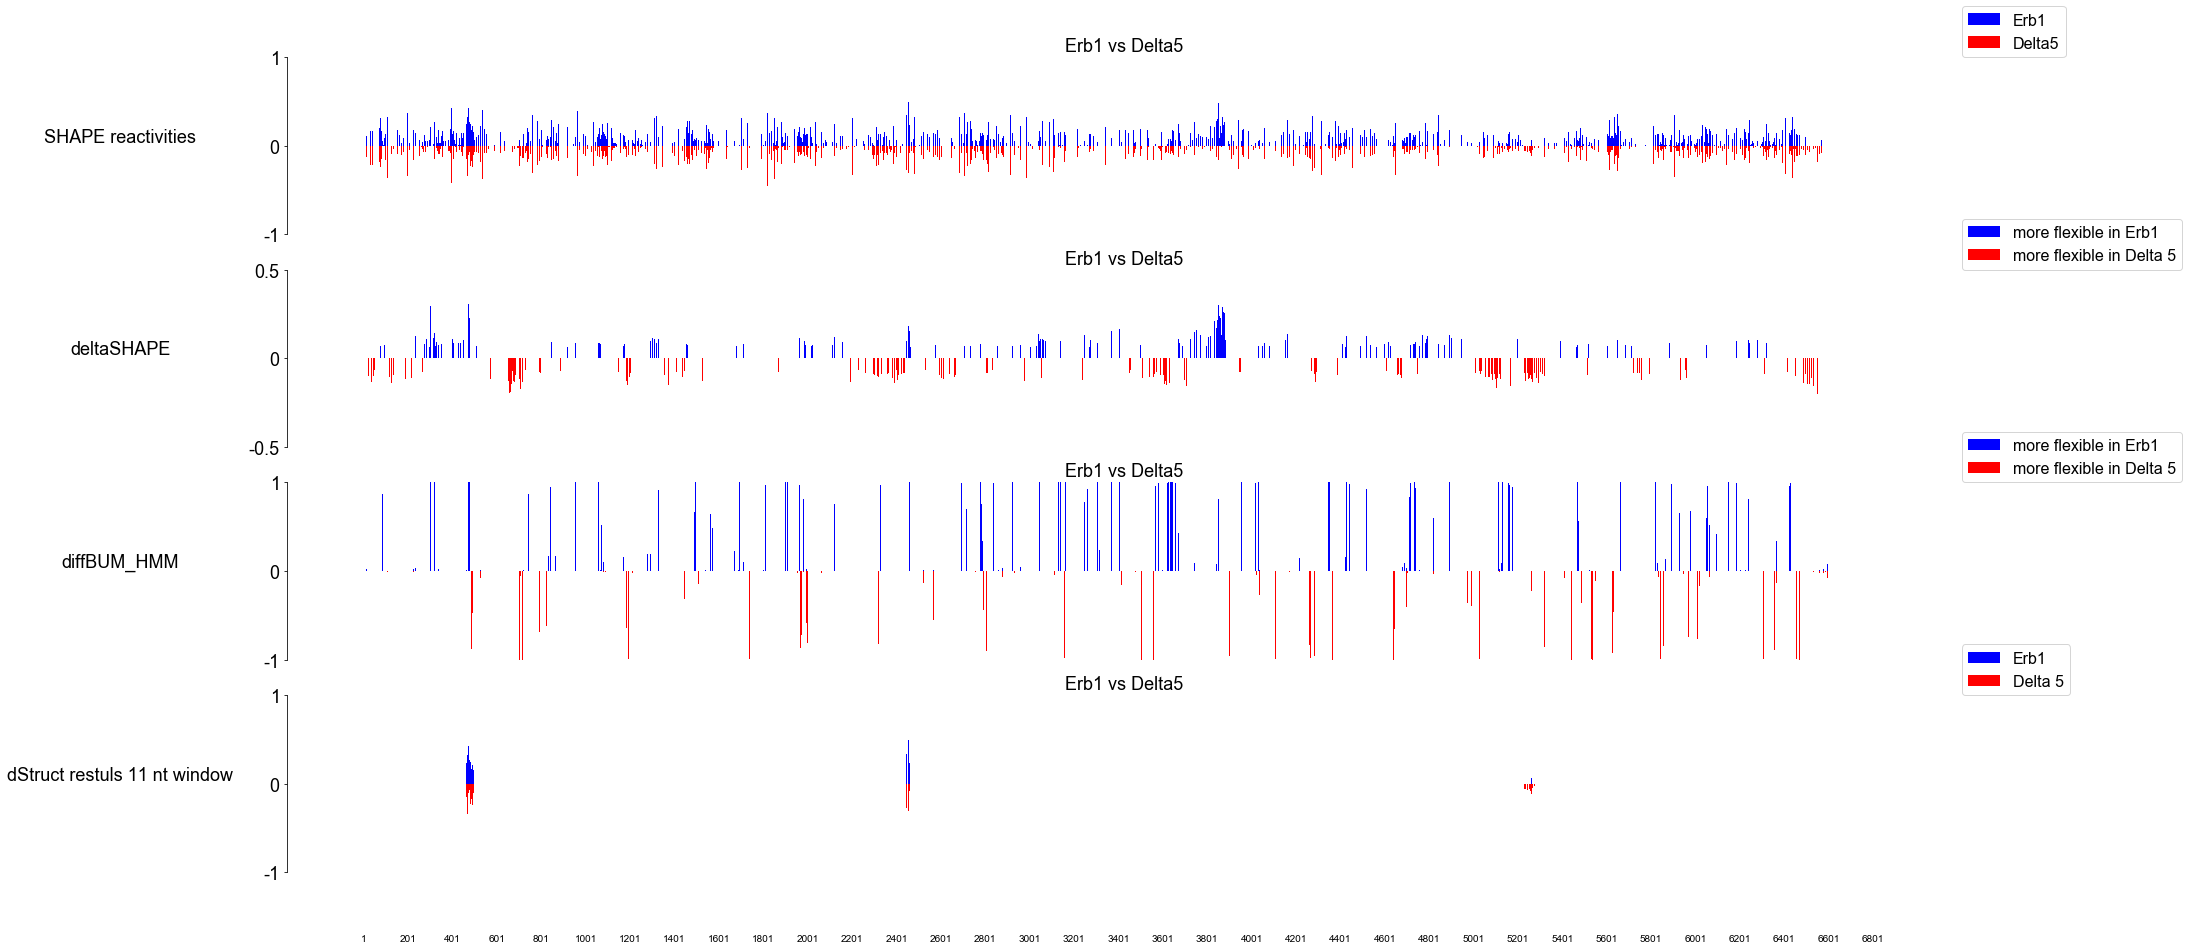

In [13]:
count = 0
numberofplots = 4

fig,ax = plt.subplots(numberofplots,figsize=[30,15],sharex=True)

### Plotting the raw SHAPE values:

plusvalues = erb
x = plusvalues.index
y = plusvalues.reactivity.values
wild_type = ax[count].bar(x,y,color='blue')
minusvalues = -deltafive
x = minusvalues.index
y = minusvalues.reactivity.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
xticks = list(np.arange(1,len(x),200))
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'SHAPE reactivities',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('Erb1', 'Delta5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

### Plotting the deltaSHAPE results:

selection = deltashapeone
plusvalues  = selection.DeltaSHAPE[selection.DeltaSHAPE > 0]
minusvalues = selection.DeltaSHAPE[selection.DeltaSHAPE < 0]

x = plusvalues.index
y = plusvalues.values
wild_type = ax[count].bar(x,y,color='blue')
x = minusvalues.index
y = minusvalues.values
ymin = -0.5
ymax = 0.5
mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

### Plotting the diffBUM_HMM results:

selection = diff_bumhmm
x = selection.index
y = selection.UM.values
wild_type = ax[count].bar(x,y,color='blue')
x = selection.index
y = -selection.MU.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

### Plotting the dStruct results:

### The only region in the 5'ETS that was called was the 462 to 496 region.
### Plot the SHAPE reactivities for this region.

dstructfirst = range(462,497)
dstructsecond = range(2443,2466)
dstructthird = range(5229,5289)

allcoords = list()
allcoords.extend(dstructfirst)
allcoords.extend(dstructsecond)
allcoords.extend(dstructthird)

plusvalues = erb.loc[allcoords]
x = plusvalues.index
y = plusvalues.reactivity.values
wild_type = ax[count].bar(x,y,color='blue')
minusvalues = -deltafive.loc[allcoords]
x = minusvalues.index
y = minusvalues.reactivity.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'dStruct restuls 11 nt window',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('Erb1', 'Delta 5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

fig.savefig("deltaSHAPE_diffBUM_HMM_dStruct_comparision_35S.pdf",dpi=400)

### How many nucleotides do deltaSHAPE and diffBUM_HMM call differentially modified?

In [14]:
deltashapeaverage = np.mean([len(deltashapeone.index),len(deltashapetwo.index)])
print(deltashapeaverage)

1142.0


In [15]:
diff_bumhmmaverage = np.mean([len(diff_bumhmm[diff_bumhmm.UM > 0.90]),len(diff_bumhmm[diff_bumhmm.MU > 0.95])])

In [16]:
diff_bumhmmaverage

240.5

In [17]:
diff_allbumhmmaverage = np.mean([len(diff_bumhmm[diff_bumhmm.UM > 0.05]),len(diff_bumhmm[diff_bumhmm.MU > 0.05])])

In [18]:
diff_allbumhmmaverage

443.5

In [19]:
len(diff_bumhmm.index)

6597

### Data for the 5'ETS

### Loading PE data

In [20]:
pedata = pd.read_csv("../../Data/35S_pre_rRNA_PEA_data_with_5end_18S.txt",sep="\t",index_col=0,header=0)
pedata[pedata <= 0.25] = 0

In [21]:
pedata.tail()

,deltaErb,delta5
positions,,
795,0.849447,0.892464
796,0.361656,0.331547
797,0.412652,0.353761
798,0.000000,0.000000
799,0.000000,0.000000


### Regions that were verified by primer extension:

In [22]:
first = [268,352]
second = [405,502]
third = [701,797]

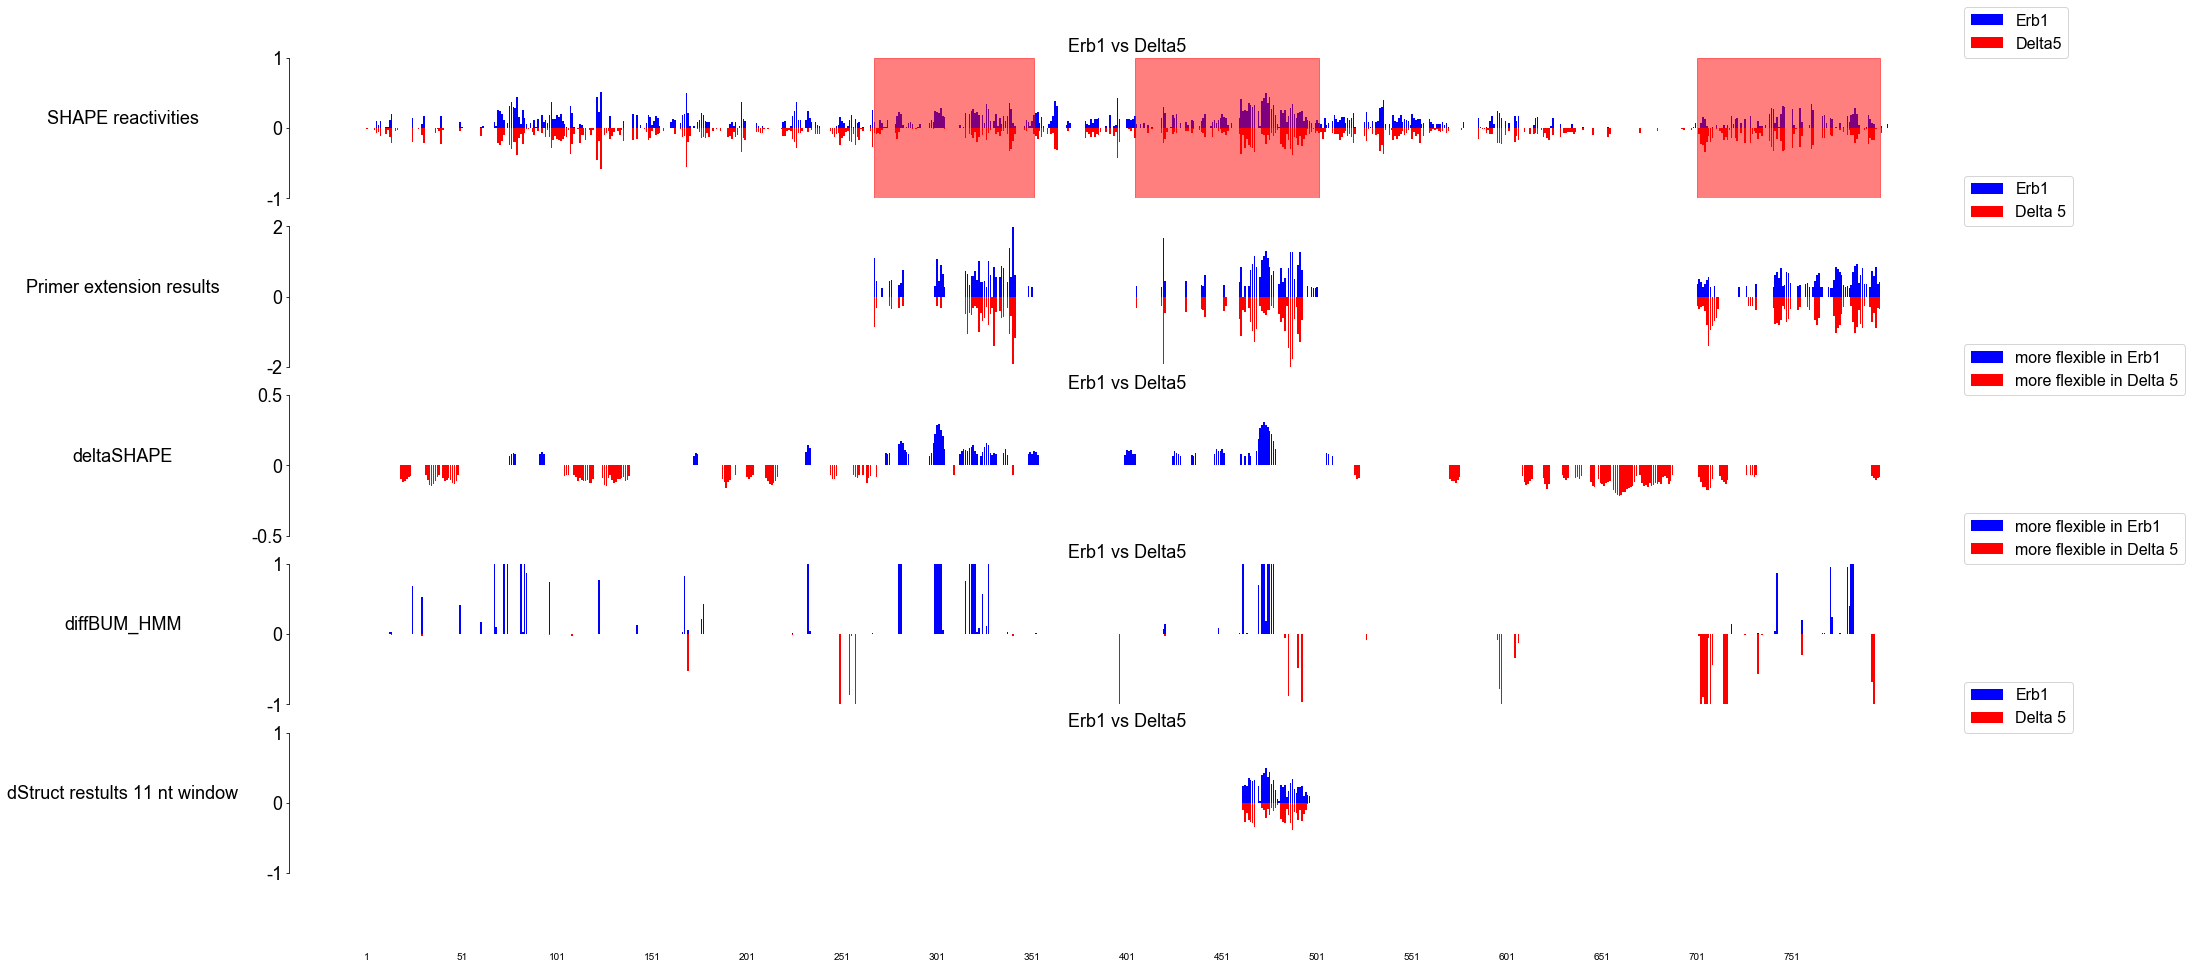

In [23]:
count = 0
numberofplots = 5

start = 1
end = 800

fig,ax = plt.subplots(numberofplots,figsize=[30,15],sharex=True)

### Plotting the raw SHAPE values:

plusvalues = erb.loc[start:end+1]
x = plusvalues.index
y = plusvalues.reactivity.values
wild_type = ax[count].bar(x,y,color='blue')
minusvalues = -deltafive.loc[start:end]
x = minusvalues.index
y = minusvalues.reactivity.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
xticks = list(np.arange(start,end,50))
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'SHAPE reactivities',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('Erb1', 'Delta5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)
ax[count].axvspan(first[0],first[1],color='red',alpha=0.5)
ax[count].axvspan(second[0],second[1],color='red',alpha=0.5)
ax[count].axvspan(third[0],third[1],color='red',alpha=0.5)

count += 1

### Plotting the primer extension data

plusvalues = pedata.deltaErb.loc[start:end+1]
minusvalues = pedata.delta5.loc[start:end+1]

x = plusvalues.index
y = plusvalues.values
wild_type = ax[count].bar(x,y,color='blue')

x = minusvalues.index
y = -minusvalues.values

ymin = -2
ymax = 2

mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'Primer extension results',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].legend((wild_type,mutant), ('Erb1', 'Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the deltaSHAPE results:

selection = deltashapeone.loc[start:end+1]
plusvalues  = selection.DeltaSHAPE[selection.DeltaSHAPE > 0]
minusvalues = selection.DeltaSHAPE[selection.DeltaSHAPE < 0]

x = plusvalues.index
y = plusvalues.values
wild_type = ax[count].bar(x,y,color='blue')
x = minusvalues.index
y = minusvalues.values
ymin = -0.5
ymax = 0.5
mutant = ax[count].bar(x,y,color='red')
#xticks = list(np.arange(start,end,50))
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the diffBUM_HMM results:

selection = diff_bumhmm.iloc[start:end+1]
x = selection.index
y = selection.UM.values
wild_type = ax[count].bar(x,y,color='blue')
x = selection.index
y = -selection.MU.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
xticks = list(np.arange(start,end,50))
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the dStruct results:

### The only region in the 5'ETS that was called was the 462 to 496 region.
### Plot the SHAPE reactivities for this region.

start = 462
end = 496

plusvalues = erb.loc[start:end+1]
x = plusvalues.index
y = plusvalues.reactivity.values
wild_type = ax[count].bar(x,y,color='blue')
minusvalues = -deltafive.loc[start:end]
x = minusvalues.index
y = minusvalues.reactivity.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'dStruct restults 11 nt window',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('Erb1', 'Delta 5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

fig.savefig("deltaSHAPE_diffBUM_HMM_dStruct_comparision_5ETS.pdf",dpi=400)

### Calculating deltaPE for the primer extension data:

In [24]:
pedata.head()

,deltaErb,delta5
positions,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [25]:
pedata = pedata.replace(np.nan,0)

In [26]:
pedata.head()

,deltaErb,delta5
positions,,
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [27]:
diffPE = pedata.deltaErb - pedata.delta5

In [28]:
diffPE.head()

positions
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
dtype: float64

### Now making plots for the individual regions:

In [29]:
first = [268,352]
second = [405,502]
third = [701,797]

In [30]:
sequence = open("../../Reference_sequences/35S_pre-rRNA_refseq.seq","r").readlines()

In [31]:
sequence = sequence[0].strip()

In [32]:
print(sequence[:10])

ATGCGAAAGC


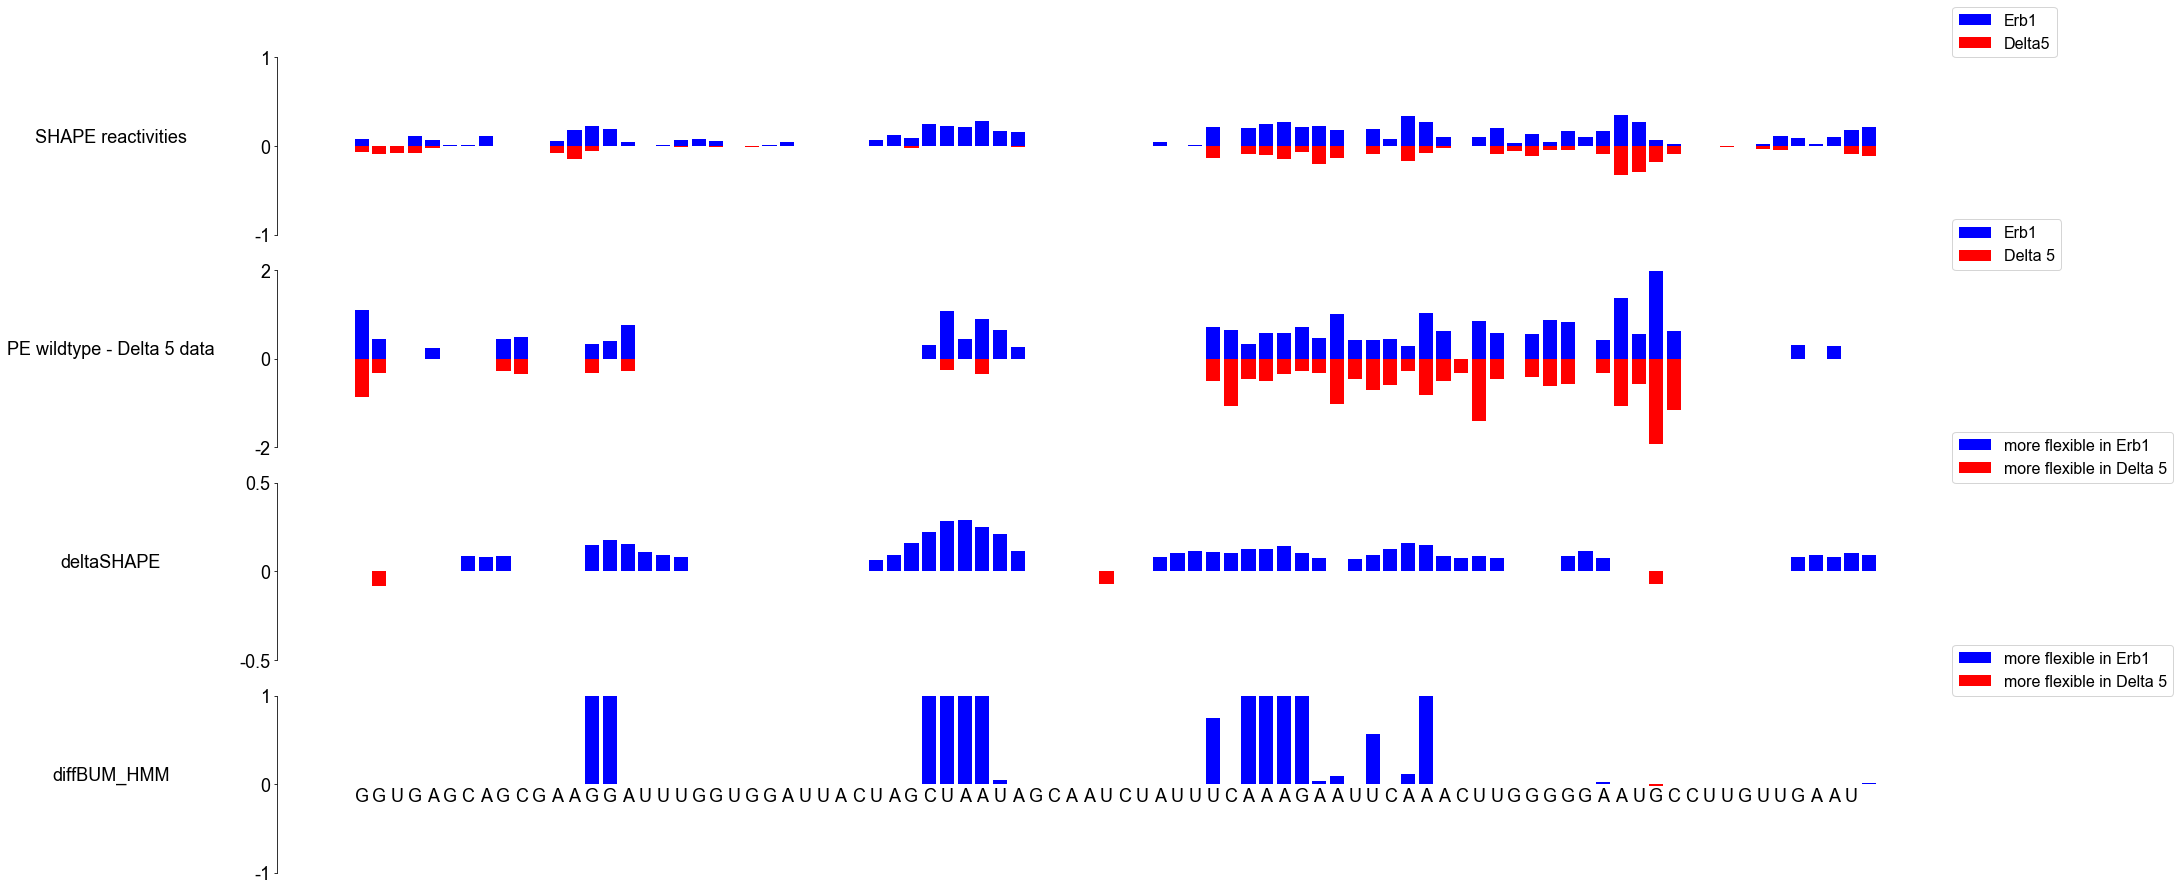

In [43]:
count = 0
numberofplots = 4
fig,ax = plt.subplots(numberofplots,figsize=[30,15],sharex=True)

start,end = first

### Plotting the raw SHAPE values:

plusvalues = erb.loc[start:end+1]
x = plusvalues.index
y = plusvalues.reactivity.values
wild_type = ax[count].bar(x,y,color='blue')
minusvalues = -deltafive.loc[start:end+1]
x = minusvalues.index
y = minusvalues.reactivity.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')

fragment = list(sequence[start-1:end].replace("T","U"))
#print(list(fragment))

xticks = list(np.arange(start,end+1))
xticklabels = fragment
                   
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'SHAPE reactivities',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

ax[count].legend((wild_type,mutant), ('Erb1', 'Delta5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the primer extension data

plusvalues = pedata.deltaErb.loc[start:end+1]
minusvalues = pedata.delta5.loc[start:end+1]

x = plusvalues.index
y = plusvalues.values

wild_type = ax[count].bar(x,y,color='blue')

x = minusvalues.index
y = -minusvalues.values

ymin = -2
ymax = 2

mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'PE wildtype - Delta 5 data',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

ax[count].legend((wild_type,mutant), ('Erb1', 'Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the deltaSHAPE results:

selection = deltashapeone.loc[start:end+1]
plusvalues  = selection.DeltaSHAPE[selection.DeltaSHAPE > 0]
minusvalues = selection.DeltaSHAPE[selection.DeltaSHAPE < 0]

x = plusvalues.index
y = plusvalues.values

wild_type = ax[count].bar(x,y,color='blue')

x = minusvalues.index
y = minusvalues.values
ymin = -0.5
ymax = 0.5
mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the diffBUM_HMM results:

selection = diff_bumhmm.iloc[start:end+1]
x = selection.index
y = selection.UM.values
wild_type = ax[count].bar(x,y,color='blue')
x = selection.index
y = -selection.MU.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### No dStruct data for this region

fig.savefig("deltaSHAPE_diffBUM_HMM_dStruct_comparision_%s_%s.pdf" % (start,end),dpi=400)

405 502


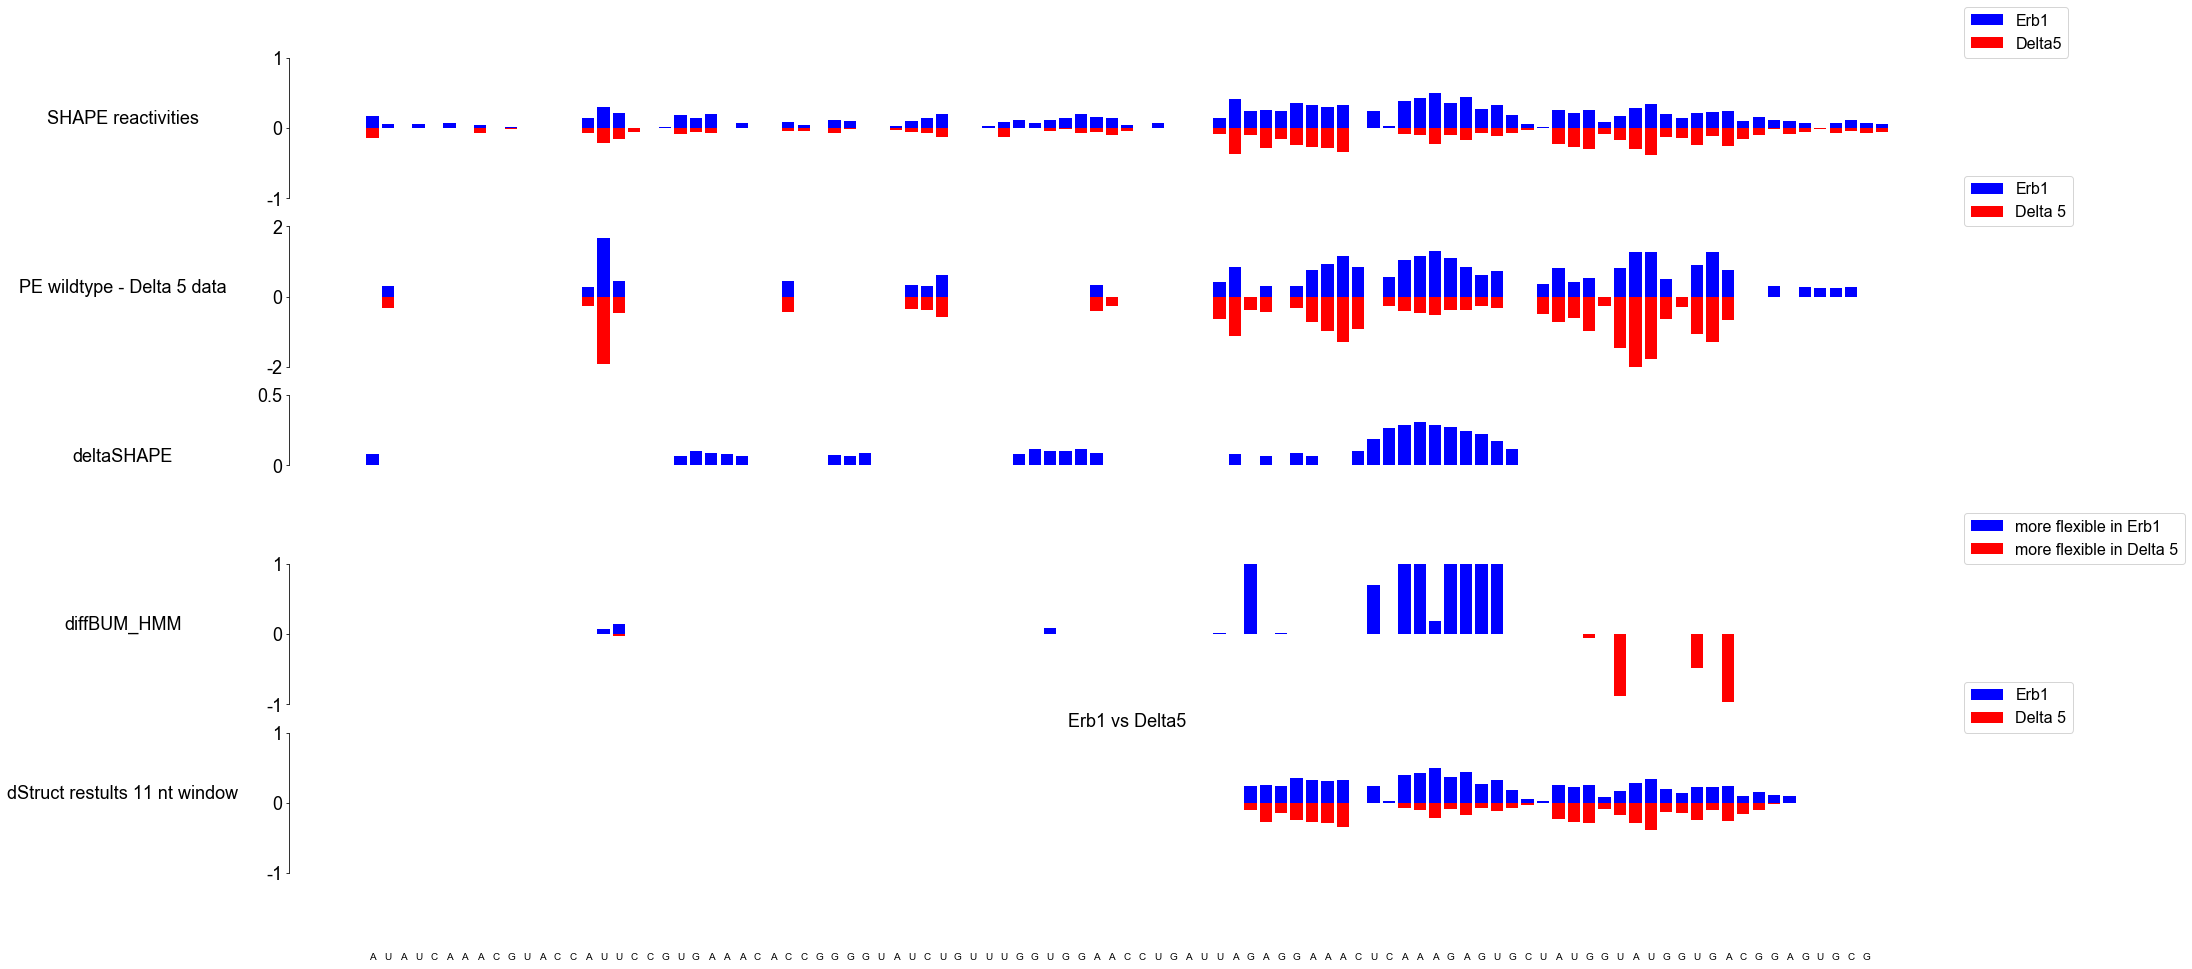

In [46]:
count = 0
numberofplots = 5
fig,ax = plt.subplots(numberofplots,figsize=[30,15],sharex=True)

start,end = second
print(start,end)

### Plotting the raw SHAPE values:

plusvalues = erb.loc[start:end+1]
x = plusvalues.index
y = plusvalues.reactivity.values
wild_type = ax[count].bar(x,y,color='blue')
minusvalues = -deltafive.loc[start:end+1]
x = minusvalues.index
y = minusvalues.reactivity.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')

fragment = list(sequence[start-1:end].replace("T","U"))
#print(list(fragment))

xticks = list(np.arange(start,end+1))
xticklabels = fragment
                   
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'SHAPE reactivities',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

ax[count].legend((wild_type,mutant), ('Erb1', 'Delta5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the primer extension data

plusvalues = pedata.deltaErb.loc[start:end+1]
minusvalues = pedata.delta5.loc[start:end+1]

x = plusvalues.index
y = plusvalues.values

wild_type = ax[count].bar(x,y,color='blue')

x = minusvalues.index
y = -minusvalues.values

ymin = -2
ymax = 2

mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'PE wildtype - Delta 5 data',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

ax[count].legend((wild_type,mutant), ('Erb1', 'Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the deltaSHAPE results:

selection = deltashapeone.loc[start:end+1]
plusvalues  = selection.DeltaSHAPE[selection.DeltaSHAPE > 0]
minusvalues = selection.DeltaSHAPE[selection.DeltaSHAPE < 0]

x = plusvalues.index
y = plusvalues.values

wild_type = ax[count].bar(x,y,color='blue')

x = minusvalues.index
y = minusvalues.values
ymin = -0.5
ymax = 0.5

mutant = ax[count].bar(x,y,color='red')

formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

#ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)

count += 1

### Plotting the diffBUM_HMM results:

selection = diff_bumhmm.iloc[start:end+1]
x = selection.index
y = selection.UM.values

wild_type = ax[count].bar(x,y,color='blue')

x = selection.index
y = -selection.MU.values
ymin = -1
ymax = 1

mutant = ax[count].bar(x,y,color='red')

formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks,\
           xticklabels = xticklabels)

ax[count].legend((wild_type,mutant), ('more flexible in Erb1', 'more flexible in Delta 5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

### Plotting the dStruct results:

### The only region in the 5'ETS that was called was the 462 to 496 region.
### Plot the SHAPE reactivities for this region.

start = 462
end = 496

plusvalues = erb.loc[start:end+1]
x = plusvalues.index
y = plusvalues.reactivity.values
wild_type = ax[count].bar(x,y,color='blue')
minusvalues = -deltafive.loc[start:end]
x = minusvalues.index
y = minusvalues.reactivity.values
ymin = -1
ymax = 1
mutant = ax[count].bar(x,y,color='red')
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'dStruct restults 11 nt window',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Erb1 vs Delta5',fontsize=18)
ax[count].legend((wild_type,mutant), ('Erb1', 'Delta 5'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

fig.savefig("deltaSHAPE_diffBUM_HMM_dStruct_comparision_%s_%s.pdf" % (start,end),dpi=400)